# Import some library that we need

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing  import PolynomialFeatures # pip install scikit-learn

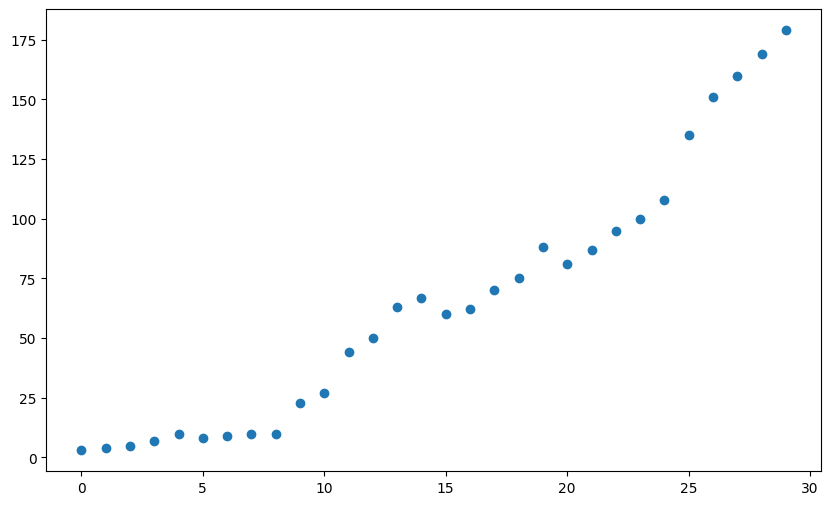

In [3]:
x = np.arange(0, 30)
y = [3, 4, 5, 7, 10, 8, 9, 10, 10, 23, 27, 44, 50, 63, 67, 60, 62, 70, 75, 88, 81, 87, 95, 100, 108, 135, 151, 160, 169, 179]
plt.figure(figsize=(10,6))
plt.scatter(x, y)
plt.show()

In [9]:

poly = PolynomialFeatures(degree=2, include_bias=False)

In [10]:
poly_features = poly.fit_transform(x.reshape(-1, 1))

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, y)

LinearRegression()

In [13]:
y_predicted = poly_reg_model.predict(poly_features)

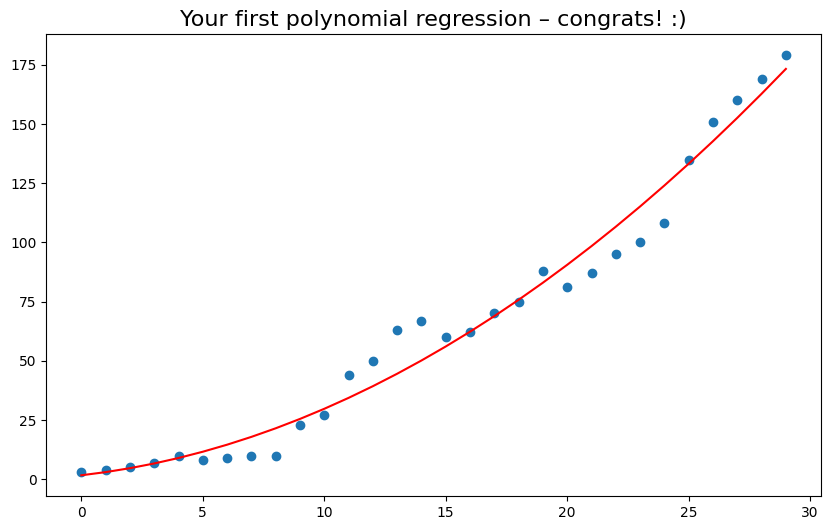

In [14]:
plt.figure(figsize=(10, 6))
plt.title("Your first polynomial regression – congrats! :)", size=16)
plt.scatter(x, y)
plt.plot(x, y_predicted, c="red")
plt.show()